In [129]:
import matplotlib
import numpy as np
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import machine learning modules

In [130]:
import coremltools

## Inference 

Load deeplabv2 model that has been converted to coreml

In [131]:
model = coremltools.models.MLModel('models/DeepLab.mlmodel')
labels = ['Background','Aeroplane','Bicycle','Bird','Boat','Bottle','Bus','Car','Cat','Chair','Cow','Diningtable','Dog','Horse','Motorbike','Person','Pottedplant','Sheep','Sofa','Train','Tvmonitor']
spec = model._spec
input_width = spec.description.input[0].type.imageType.width
input_height = spec.description.input[0].type.imageType.height
print(spec.description)

input {
  name: "image"
  shortDescription: "Input image"
  type {
    imageType {
      width: 513
      height: 513
      colorSpace: RGB
    }
  }
}
output {
  name: "scores"
  shortDescription: "Segmentation map"
  type {
    imageType {
      width: 513
      height: 513
      colorSpace: GRAYSCALE
    }
  }
}
metadata {
  shortDescription: "DeepLab v3+ on MobileNet v2"
  versionString: "v1.0"
  author: "https://github.com/tensorflow/models/tree/master/research/deeplab"
  license: "Apache License"
}



(894, 1341, 3)


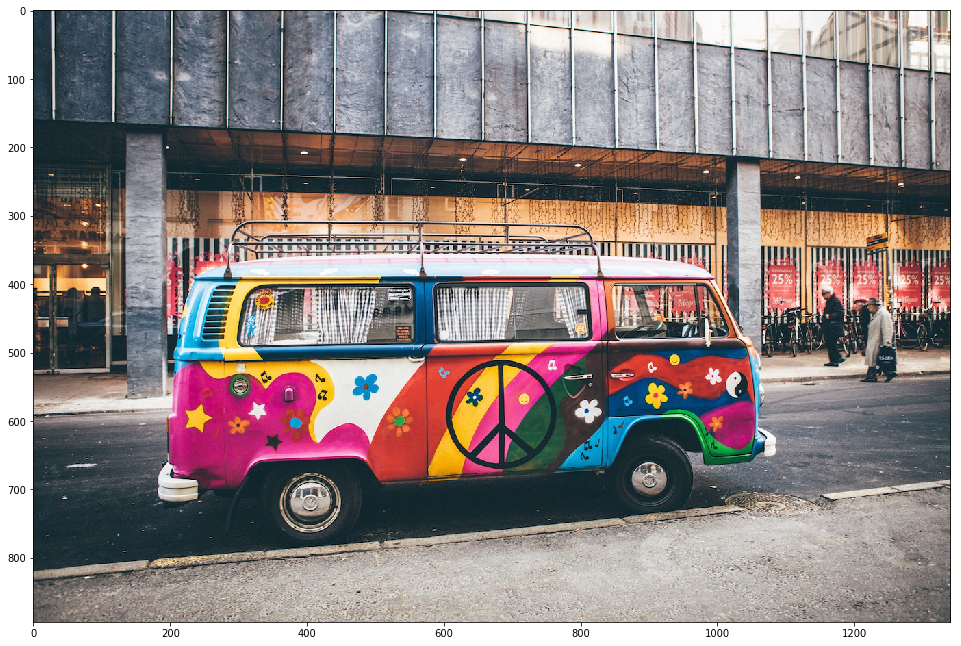

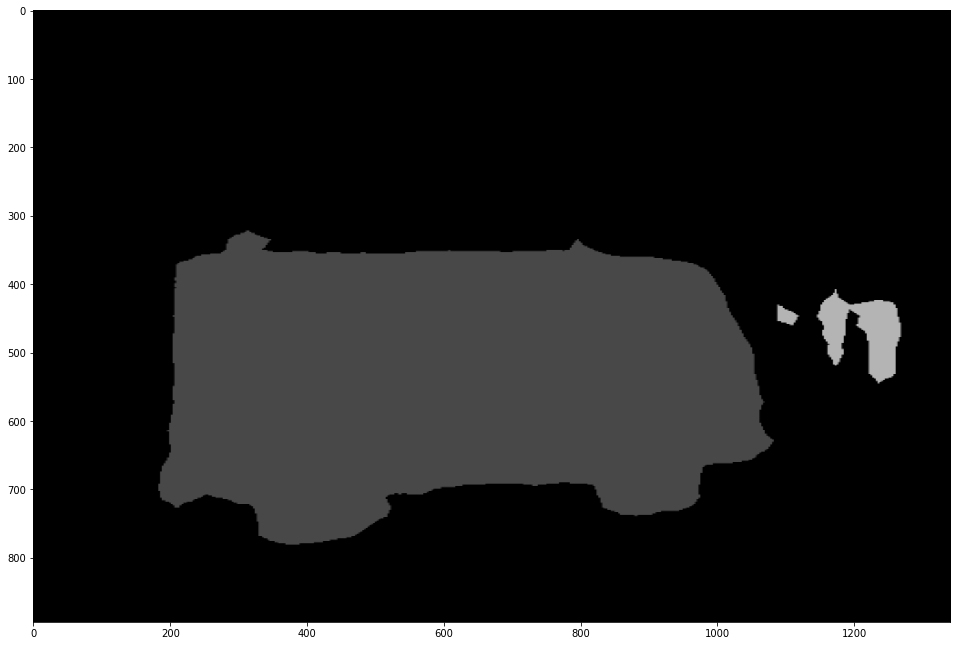

In [132]:
img = PIL.Image.open('samples/minivan.jpg')
print(np.array(img).shape)
image_width = np.array(img).shape[1]
image_height = np.array(img).shape[0]
resized_img = img.resize((input_width, input_height), PIL.Image.BILINEAR)
y = model.predict({"image": resized_img}, usesCPUOnly=False)
mask = y['scores']
bilinear_scaled_mask = mask.resize((image_width, image_height), PIL.Image.BILINEAR)
plt.imshow(img)
plt.show()
plt.imshow(bilinear_scaled_mask)
plt.show()

## Apply Core Image Filter
Start by importing pycore image filters

In [133]:
from pycoreimage.pyci import cimg, show, color, inset

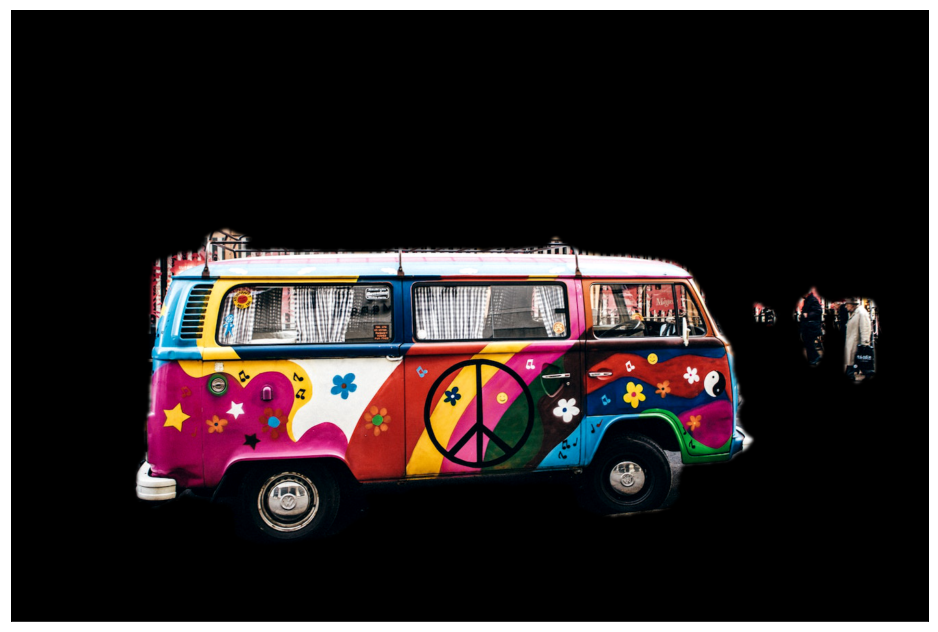

In [143]:
scale_width = image_width/input_width
scale_height = image_height/input_height
ci_mask_resized = cimg(np.array(mask)).scale(scale_width,scale_height).gammaAdjust(power=0.1).gaussianBlur(radius=2)
ci_fg = cimg(np.array(img)).colorControls(contrast=1.4, saturation = 0.8)
# ci_bg = cimg(np.array(img)).photoEffectNoir()
# ci_bg = cimg(np.array(img)).gaussianBlur(radius=3)
ci_bg = cimg.fromColor(0,0,0,1)
result = ci_fg.blendWithMask(backgroundImage=ci_bg, maskImage=ci_mask_resized)
show([result])

Log all filters

In [24]:
for i,f in enumerate(cimg.filters()):
    print('{:3d}\t {}'.format(i,f))

  0	 CIAccordionFoldTransition
  1	 CIAdditionCompositing
  2	 CIAffineClamp
  3	 CIAffineTile
  4	 CIAffineTransform
  5	 CIAreaAverage
  6	 CIAreaHistogram
  7	 CIAreaMaximum
  8	 CIAreaMaximumAlpha
  9	 CIAreaMinimum
 10	 CIAreaMinimumAlpha
 11	 CIAreaMinMax
 12	 CIAreaMinMaxRed
 13	 CIAttributedTextImageGenerator
 14	 CIAztecCodeGenerator
 15	 CIBarcodeGenerator
 16	 CIBarsSwipeTransition
 17	 CIBicubicScaleTransform
 18	 CIBlendWithAlphaMask
 19	 CIBlendWithBlueMask
 20	 CIBlendWithMask
 21	 CIBlendWithRedMask
 22	 CIBloom
 23	 CIBokehBlur
 24	 CIBoxBlur
 25	 CIBumpDistortion
 26	 CIBumpDistortionLinear
 27	 CICameraCalibrationLensCorrection
 28	 CICheckerboardGenerator
 29	 CICircleSplashDistortion
 30	 CICircularScreen
 31	 CICircularWrap
 32	 CIClamp
 33	 CICMYKHalftone
 34	 CICode128BarcodeGenerator
 35	 CIColorBlendMode
 36	 CIColorBurnBlendMode
 37	 CIColorClamp
 38	 CIColorControls
 39	 CIColorCrossPolynomial
 40	 CIColorCube
 41	 CIColorCubesMixedWithMask
 42	 CIColorCubeW